# Supervised Learning Algorithm

## 1. Linier Regression

Mengimport packages yang dibutuhkan:

In [2]:
import numpy as np

Membuat fungsi $f_{w,b}(x) = w.x + b$ 

In [29]:
# membuat fungsi f_wb
def f_wb(x,w,b):
    f_wb = np.dot(x,w) + b
    return f_wb

Membuat cost function $J(w,b) = 1/2m \sum{(w.x + b - y)^2}$

In [ ]:
def j_wb(x,y,w,b):
    m = y.shape[0]
    fwb = f_wb(x,w,b)
    j = np.round(1/(2*m) * np.sum((fwb - y)**2),5)
    return j

Contoh #1

In [ ]:
# Contoh 1
# Menyiapkan Dataset
x1 = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
y1 = np.array([16,32,51])

# Menginisiasi nilai parameter w dan b
w_init = np.ones(x1.shape[1])*2
b_init = 3

# Menghitung fungsi f dan j
fwb = f_wb(x1,w_init,b_init)
jwb = j_wb(x1,y1,w_init,b_init)

print(f'y: {y1} | f_wb: {fwb} | j_wb: {jwb}')

Gradient Descent untuk mencari nilai minimum J

In [27]:
def graddesc(x,y,w,b,alpha=1e-5,num_iteration=1000):
    m = y.shape[0]
    fwb = f_wb(x,w,b)
    jwb = j_wb(x,y,w,b)
    for _ in range(num_iteration):
        djdw = 1/m * np.dot((fwb - y),x)
        djdb = 1/m * np.sum(fwb - y)
        w = w - alpha*djdw
        b = b - alpha*djdb
        fwb = f_wb(x,w,b)
        jwb = j_wb(x,y,w,b)
    return w,b,fwb,jwb

In [ ]:
w,b,fwb,jwb = graddesc(x1,y1,w_init,b_init,2e-2,10000)

In [ ]:
print(w)
print(b)
print(fwb)
print(y1)
print(jwb)

Contoh 2

In [ ]:
# Contoh 2

# Menyiapkan dataset
x2 = np.array((np.random.randint(500,1000,5),np.random.randint(1,6,5)),dtype=float).T
y2 = np.array([200,900,150,190,210])

# Inisiasi w dan b
w_init = np.ones(x2.shape[1])
b_init = 0

# Menghitung fwb dan jwb
fwb = f_wb(x2,w_init,b_init)
jwb = j_wb(x2,y2,w_init,b_init)

print(fwb)
print(x2)
print(x2.shape)
print(y2)
print(y2.shape)
print(jwb)

In [ ]:
mean = np.mean(x2,axis=0)
mean

In [ ]:
max = np.max(x2[:,1])
min = np.min(x2[:,1])
selisih = max - min
print(f'{x2[:,1]} - {mean[1]} = {(x2[:,1]-mean[1])/selisih}')

Menggunakan feature scaling

In [ ]:
# Mean Normalization
def mean_normalize(x):
    mean = np.mean(x,axis=0)
    x_cop = np.copy(x)
    try:
        m,n = x_cop.shape
        for i in range(n):
            max = np.max(x_cop[:,i])
            min = np.min(x_cop[:,i])
            x_cop[:,i] = (x_cop[:,i] - mean[i])/(max-min)
    except:
        max = np.max(x)
        max = np.min(x)
        x_cop = (x_cop - mean) / (max - min)

    return x_cop



In [ ]:
x2_norm = mean_normalize(x2)

In [ ]:
# print(x2_norm)
print(x2)

In [ ]:
def z_normalized(x):
    mean = np.mean(x,axis=0)
    mu = np.std(x,axis=0)
    x_cop = np.copy(x)
    try:
        n = x.shape[1]
        for i in range(n):
            x_cop[:,i] = (x_cop[:,i] - mean[i])/ mu[i]
    except:
        x_cop = (x_cop - mean) / mu
    return x_cop

In [ ]:
z_x2 = z_normalized(x2)

In [ ]:
print(z_x2)
print(x2_norm)
print(x2)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# plt.scatter(x2[:,1],x2[:,0],label='Unnormalized',color='r')
plt.scatter(x2_norm[:,1],x2_norm[:,0],label='Mean Normalized',color='g')
plt.scatter(z_x2[:,1],z_x2[:,0],label='Z-score Normalized',color='cyan')
plt.legend()
plt.show()

In [ ]:
w2,b3,fwb2,jwb2 = graddesc(x2_norm,y2,w_init,b_init,1e-3)
w3,b3,fwb3,jwb3 = graddesc(z_x2,y2,w_init,b_init,1)

print("Error")
print(jwb2)
print(jwb3)
print()
print("Data Asli dan Prediksi")
print(y2)
print(fwb)
print(fwb2)
print(fwb3)
print()
print("Parameter w")
print(w_init)
print(w2)
print(w3)

Menggunakan Scikit-Learn

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale/Normalize Training Data
scaler = StandardScaler()
X2_norm = scaler.fit_transform(x2)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x2,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X2_norm,axis=0)}")
print(f"Peak to Peak range by column in Normalized Tanpa Scikit-Learn X:{np.ptp(x2_norm,axis=0)}")

In [ ]:
# Membuat dan fit regresssion model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X2_norm, y2)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X2_norm)
# make a prediction using w,b. 
y_pred = np.dot(X2_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y2[:4]}")

In [ ]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x2[:,i],y2, label = 'target')
    ax[i].scatter(x2[:,i],y_pred,color='orange', label = 'predict')
ax[0].set_ylabel("y"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [ ]:
my_ypred = np.dot(z_x2,w3) + b3

In [ ]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x2[:,i],y2, label = 'target')
    ax[i].scatter(x2[:,i],my_ypred,color='orange', label = 'predict')
ax[0].set_ylabel("y"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model without scikit-learn")
plt.show()

In [ ]:
error1 = j_wb(X2_norm,y2,w_norm,b_norm)
error2 = j_wb(z_x2,y2,w3,b3)

In [ ]:
print(error1)
print(error2)

print(w3)
print(w_norm)

## 2. Polynomial Regression

Mengimport packages yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Menyiapkan dataset

In [ ]:
x = np.arange(0,20,1,dtype=float)
y = x**2

In [ ]:
plt.scatter(x,y,marker='x',c='r')
plt.show()

In [ ]:
# Inisiasi parameter
try:
    w_init = np.zeros(X.shape[1])
except:
    w_init = 0
b_init = 0

In [ ]:
w_init

In [ ]:
# menambahkan engineered feature
X = np.c_[x,x**2]
X

In [ ]:
z_x = z_normalized(X)


In [ ]:
fwb = f_wb(x,0,0)
fwb

In [ ]:
jwb = j_wb(X,y,w2,b2)
jwb

In [ ]:
jwb2 = j_wb()

In [ ]:
w = 0
b = 0

In [ ]:
w,b,_,_ = graddesc(z_x,y,w_init,b_init,1e-5,800)

In [ ]:
w2,b2,_,_ = graddesc(X,y,w_init,b_init,1e-5,500)

In [ ]:
y_pred = np.dot(X,w2)+b2
y_pred

In [ ]:
y

In [ ]:
plt.scatter(np.arange(0,20,1),y,marker='x',c='r',label='actual value')
plt.plot(np.arange(0,20,1),y_pred,c='blue',label='predicted value')
plt.legend()
plt.show()

## 3. Classification

Contoh 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Menyiapkan Dataset

In [7]:
x = np.random.randint(0,10,10)
x

array([3, 8, 2, 1, 7, 6, 0, 6, 3, 2])

In [8]:
y = np.array([0,1,0,0,1,1,0,1,0,0])
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

Plot Dataset

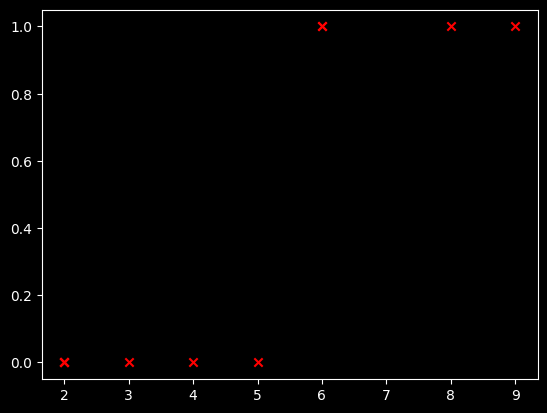

In [9]:
plt.scatter(x,y,marker='x',c='r')
plt.show()

Membuat Fungsi Sigmoid

In [10]:
def sigmoid(z):
    sgm = 1 / (1 + np.exp(-z))
    return sgm

Inisiasi parameter w dan b

In [11]:
try:
    w_init = np.ones(x.shape[1])
except:
    w_init = 1
b_init = 0

In [12]:
w_init

1

Membuat fungsi fwb

In [32]:
def sigfwb(x,w,b):
    z = np.dot(x,w) + b
    fwb = sigmoid(z)
    return fwb

In [34]:
fwb = sigfwb(x,w_init,b_init)

Membuat cost function J

In [35]:
def sigjwb(x,y,w,b):
    m = y.shape[0]
    z = np.dot(x,w) + b
    fwb = sigmoid(z)
    error = np.sum(-y*np.log(fwb) - (1-y)*np.log(1-fwb))
    return error/m

In [36]:
jwb = sigjwb(x,y,w_init,b_init)
jwb

1.8459646839947688

Membuat fungsi gradient descent untuk mencari min J

In [39]:
def siggraddesc(x,y,w,b,alpha=1e-5,num_iter=1000):
    m = y.shape[0]
    fwb = sigfwb(x,w,b)
    jwb = sigjwb(x,y,w,b)
    for i in range(num_iter):
        djdw = 1/m * np.dot((fwb-y),x)
        djdb = 1/m * np.sum(fwb-y)
        w = w - alpha*djdw
        b = b - alpha*djdb
        fwb = sigfwb(x,w,b)
        jwb = sigjwb(x,y,w,b)
    return w,b,fwb,jwb


In [66]:
w,b,_,_ = siggraddesc(x,y,w_init,b_init,alpha=1,num_iter=10000)

In [67]:
fwb = sigfwb(x,w,b)
jwb = sigjwb(x,y,w,b)

In [68]:
print(fwb)
print(y)
print(jwb)

[2.34427116e-07 1.26095048e-04 9.73330323e-01 6.35317349e-02
 4.35775787e-10 4.35775787e-10 9.99999905e-01 4.35775787e-10
 1.00000000e+00 9.73330323e-01]
[0 0 1 0 0 0 1 0 1 1]
0.011982960783348873


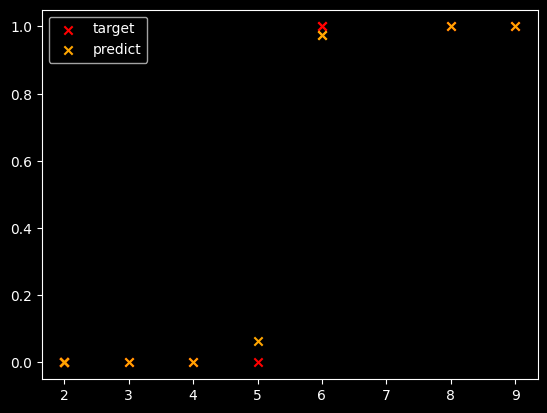

In [71]:
plt.scatter(x,y,marker='x',c='r',label='target')
plt.scatter(x,fwb,marker='x',c='orange',label='predict')
plt.legend()
plt.show()

Menggunakan Scikit-Learn

In [1]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr_model = LogisticRegression()
lr_model.fit(x.reshape(-1,1),y)

LogisticRegression()

In [12]:
y_pred = lr_model.predict(x.reshape(-1,1))

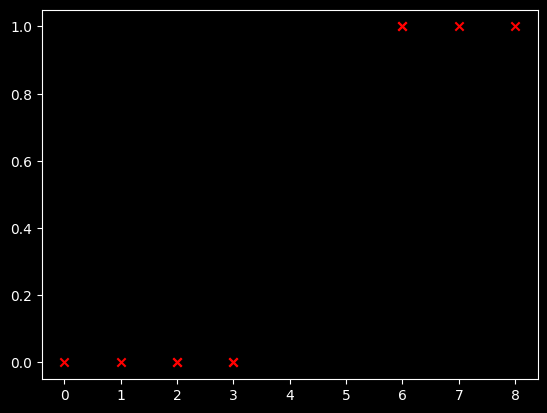

In [14]:
plt.scatter(x,y,marker='x',c='r',label='Target')
# plt.scatter(x,y_pred,marker='x',c='b',label='Prediction')
plt.show()